In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### **Common Part for Question2**

In [2]:
#Library to load Dataset
from scipy.io import loadmat
#Library to perform operations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Library for SVM - Support Vector Machine
from sklearn import svm
#Library to save the models using Joblib
from sklearn.externals import joblib 
#To measure the accuracy
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [8]:
#Loading the Dataset1
data_1 = loadmat('/content/dataset_a.mat')
print(data_1)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Oct 29 10:22:22 2020', '__version__': '1.0', '__globals__': [], 'labels': array([[0, 0, 0, ..., 1, 0, 0]]), 'samples': array([[-0.80934912, -0.49694997],
       [ 1.00498758,  0.06553162],
       [-0.62036381,  0.76291157],
       ...,
       [-0.27705231,  0.0907225 ],
       [-0.4150806 ,  0.86302363],
       [ 0.80229422,  0.48413453]])}


In [9]:
#Printing the keys of Data
print(data_1.keys())
#Printing the samples of Data
print(data_1['samples'])
#Printing the labels of the Data
print(data_1['labels'])
#Printing the length of the Data
print(len(data_1))

dict_keys(['__header__', '__version__', '__globals__', 'labels', 'samples'])
[[-0.80934912 -0.49694997]
 [ 1.00498758  0.06553162]
 [-0.62036381  0.76291157]
 ...
 [-0.27705231  0.0907225 ]
 [-0.4150806   0.86302363]
 [ 0.80229422  0.48413453]]
[[0 0 0 ... 1 0 0]]
5


In [10]:
#Printing the shape and type of the samples and labels from Dataset1
x_1 = data_1['samples']
y_1 = data_1['labels']
print("Samples Data Type",x_1.dtype)
print("Label Data Type",y_1.dtype)
print("Shape of Samples", x_1.shape)
print("Shape of Label", y_1.shape)

Samples Data Type float64
Label Data Type int64
Shape of Samples (10000, 2)
Shape of Label (1, 10000)


In [11]:
#Convert to DataFrame
sample_x = x_1[:,0]
sample_y = x_1[:,1]
label = y_1[0]
data_frame = pd.DataFrame(list(zip(sample_x,sample_y,label)), columns=["Sample_X","Sample_Y","Label"])
print(data_frame)

      Sample_X  Sample_Y  Label
0    -0.809349 -0.496950      0
1     1.004988  0.065532      0
2    -0.620364  0.762912      0
3     0.008246  0.291905      1
4     0.299287  0.023049      1
...        ...       ...    ...
9995  0.606766  0.813390      0
9996  0.194848 -0.297414      1
9997 -0.277052  0.090723      1
9998 -0.415081  0.863024      0
9999  0.802294  0.484135      0

[10000 rows x 3 columns]


In [12]:
#Printing the Information about the Dataset
print(data_frame.describe())
#Printing the DataTypes of each column of the Dataset
print("The Datatypes ")
print(data_frame.dtypes)

           Sample_X      Sample_Y         Label
count  10000.000000  10000.000000  10000.000000
mean       0.000750      0.000188      0.500000
std        0.524873      0.524560      0.500025
min       -1.161924     -1.115996      0.000000
25%       -0.291691     -0.289621      0.000000
50%       -0.001655      0.000974      0.500000
75%        0.289100      0.291125      1.000000
max        1.126386      1.152203      1.000000
The Datatypes 
Sample_X    float64
Sample_Y    float64
Label         int64
dtype: object


In [13]:
#Dividing the Dataset into Samples and Labels separately after shuffling
data_y = data_frame['Label']
print(data_y)
data_x = data_frame.drop(["Label"],axis=1)
print(data_x)

0       0
1       0
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    0
9999    0
Name: Label, Length: 10000, dtype: int64
      Sample_X  Sample_Y
0    -0.809349 -0.496950
1     1.004988  0.065532
2    -0.620364  0.762912
3     0.008246  0.291905
4     0.299287  0.023049
...        ...       ...
9995  0.606766  0.813390
9996  0.194848 -0.297414
9997 -0.277052  0.090723
9998 -0.415081  0.863024
9999  0.802294  0.484135

[10000 rows x 2 columns]


In [ ]:
# joblib.dump(data_frame, 'data_Q2.pkl')
# joblib.dump(data_x, 'data_x.pkl') 

['data_x.pkl']

In [ ]:
data_frame = joblib.load('/content/data_Q2.pkl')
data_x = joblib.load('/content/data_x.pkl') 

In [14]:
#Printing the unique values of the Target
print(np.unique(data_1['labels'][0]))

[0 1]


### **Question 2a**

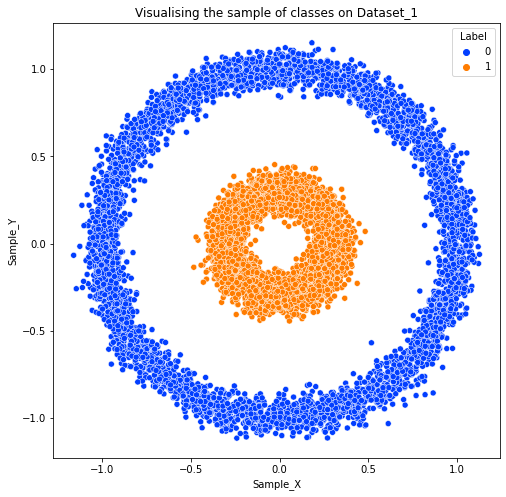

In [ ]:
def Question2a(data_frame):
  #Creating a figure of size 8*8
  plt.figure(figsize=(8,8))
  palette = sns.color_palette("bright", 2) 
  #Plotting the scatterplot for each class using seaborn
  sns.scatterplot(data=data_frame, x="Sample_X",y="Sample_Y",hue = "Label",legend='full',palette=palette)
  plt.title("Visualising the sample of classes on Dataset_1")
  plt.show()

data_frame = joblib.load('/content/data_Q2.pkl')
Question2a(data_frame)

**Splitting the Dataset into 80:20**

In [17]:
#Function to implement the split the data into train and test data
def split_train_test(data_x,data_y,percentage,total):
  split_size = int((total*percentage)/100)
  x_train = data_x[0:split_size]
  x_test = data_x[split_size:total]
  y_train = data_y[0:split_size]
  y_test = data_y[split_size:total]
  return x_train,x_test,y_train,y_test

In [19]:
data_x = joblib.load('/content/data_x.pkl')
#Dividing the Dataset into 80:20
x_train,x_test,y_train,y_test = split_train_test(data_x,data_y,80,data_x.shape[0])
#Printing the shapes of the Data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 2)
(2000, 2)
(8000,)
(2000,)


### **Question 2b**

In [ ]:
#Making the Class SVM
class SVMachine():
    def __init__(self):
      super(SVMachine, self).__init__()

    #fit function
    def fit(self,train_X,train_Y,C_val):
      #Creating a linear SVM model
      self.model = svm.SVC(kernel = 'linear',C = C_val)
      #Calling the fit from linear SVM
      self.model = self.model.fit(train_X,train_Y)
      #Returning the coefficients and the intercept
      self.coeff = self.model.coef_
      self.intercept = self.model.intercept_
      return self.coeff,self.intercept

    #predict function from scratch
    def predict(self,X_test):
      #Calculating the predicted value
      predict_y = np.dot(X_test, np.transpose(self.coeff))
      predict_y += self.intercept
      #Assigning the class labels
      for i in range(predict_y.shape[0]):
        if predict_y[i] < 0:
          predict_y[i] = 0
        else:
          predict_y[i] = 1
      return predict_y
    
    #Support vectors function
    def support_vector(self):
      return self.model.support_vectors_

In [15]:
#accuracy method to find accuracy
def accuracy(pred,actual):
  pred = np.array(pred)
  actual = np.array(actual).reshape(actual.shape[0],1)
  error = pred-actual
  val = (error == 0).sum()
  #Calculate the accuracy
  accuracy = val/pred.shape[0]
  return accuracy*100

**Saving Model**

In [ ]:
# def Question2b(x_train,y_train,x_test,y_test):
#   Question2b = []
#   #Printing the column names
#   columns_names = ["C","Testing Accuracy"]
#   #Creating a dataframe
#   Q2_b = pd.DataFrame(columns = columns_names)
#   #Grid Search for the values of C
#   c_val = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,100]
#   best_c = 0
#   best_acc = 0
#   #Loop for iterating over values of C
#   for c in c_val:
#     #Calling the SVM inbuilt class
#     model = SVMachine()
#     #Fitting model and getting the slope and intercept 
#     val,inter = model.fit(x_train, y_train,c)
#     Question2b.append(model)
#     #Predicting the values of X_test
#     y_pred = model.predict(x_test)
#     #Calculating the accuracy
#     acc_test = accuracy(y_pred,y_test)
#     if (acc_test > best_acc):
#       best_c = c
#       best_acc = acc_test
#     Q2_b = Q2_b.append({'C':c,'Testing Accuracy':acc_test},ignore_index=True)
#   print("The optimal value of C is", best_c)
#   print(Q2_b)
#   joblib.dump(Question2b, 'Question2b_grid.pkl') 

# Question2b(x_train,y_train,x_test,y_test)

         C  Testing Accuracy
0     0.01             48.80
1     0.10             54.80
2     0.20             66.70
3     0.30             66.50
4     0.40             66.50
5     0.50             66.50
6     0.60             66.55
7     0.70             66.45
8     0.80             66.45
9     0.90             66.45
10    1.00             66.45
11   10.00             66.45
12  100.00             66.45


**Loading Model for Grid Search**

In [ ]:
def Question2b(x_train,y_train,x_test,y_test):
  Question2b = []
  #Printing the column names
  columns_names = ["C","Testing Accuracy"]
  #Creating a dataframe
  Q2_b = pd.DataFrame(columns = columns_names)
  #Grid Search for the values of C
  c_val = [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,100]
  model = joblib.load('/content/Question2b_grid.pkl')
  k = 0
  best_c = 0
  best_acc = 0
  #Loop for iterating over values of C
  for c in c_val:
    #Predicting the values of X_test
    y_pred = model[k].predict(x_test)
    #Calculating the accuracy
    acc_test = accuracy(y_pred,y_test)
    if (acc_test > best_acc):
      best_c = c
      best_acc = acc_test
    k += 1
    Q2_b = Q2_b.append({'C':c,'Testing Accuracy':acc_test},ignore_index=True)
  print("The optimal value of C is", best_c)
  print(Q2_b)

Question2b(x_train,y_train,x_test,y_test)

The optimal value of C is 0.2
         C  Testing Accuracy
0     0.01             48.80
1     0.10             54.80
2     0.20             66.70
3     0.30             66.50
4     0.40             66.50
5     0.50             66.50
6     0.60             66.55
7     0.70             66.45
8     0.80             66.45
9     0.90             66.45
10    1.00             66.45
11   10.00             66.45
12  100.00             66.45


### **Visualising the Data**

**Linear SVM at C = 0.2**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


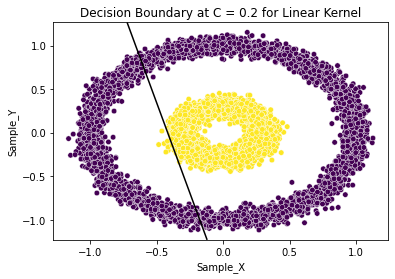

In [ ]:
#Creating the model
model = svm.SVC(kernel='linear', C=0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundary at C = 0.2 for Linear Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


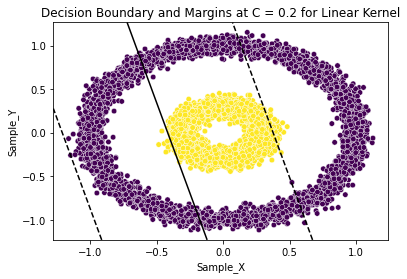

In [ ]:
#Creating the model
model = svm.SVC(kernel='linear', C=0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 0.2 for Linear Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


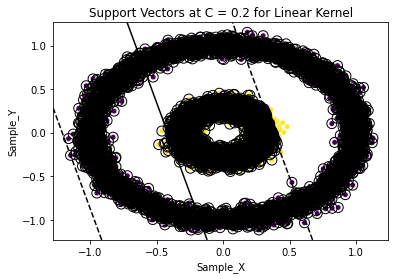

In [ ]:
#Creating the model
model = svm.SVC(kernel='linear', C=0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
#Plotting the support vectors
axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors at C = 0.2 for Linear Kernel")
plt.show()

**Linear SVM at C = 0.5**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


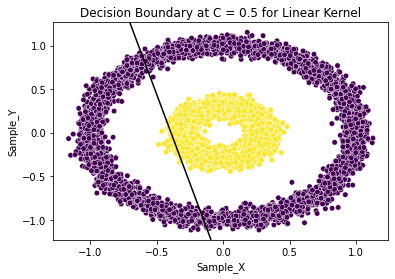

In [ ]:
#Creating the model
model = svm.SVC(kernel='linear', C=0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundary at C = 0.5 for Linear Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


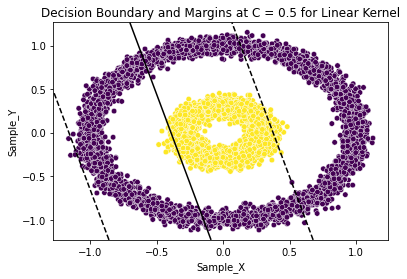

In [ ]:
#Creating the model
model = svm.SVC(kernel='linear', C=0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 0.5 for Linear Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


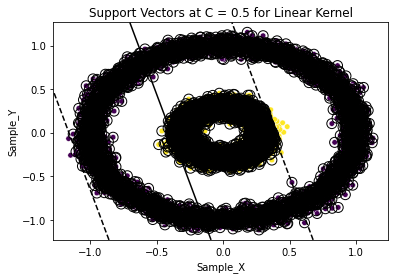

In [ ]:
#Creating the model
model = svm.SVC(kernel='linear', C=0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
#Plotting the support vectors
axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors at C = 0.5 for Linear Kernel")
plt.show()

**Linear SVM at C=1**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


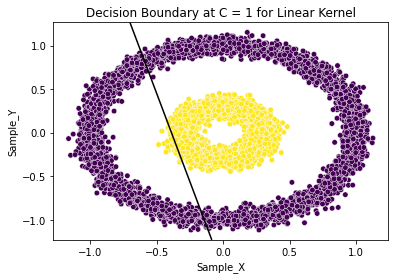

In [ ]:
#Creating the model
model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundaary at C = 1 for Linear Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


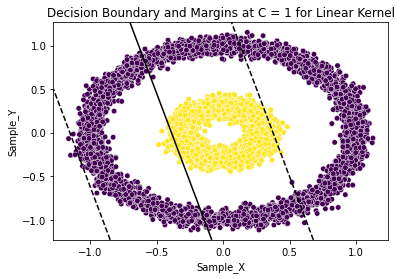

In [ ]:
#Creating the model
model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 1 for Linear Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


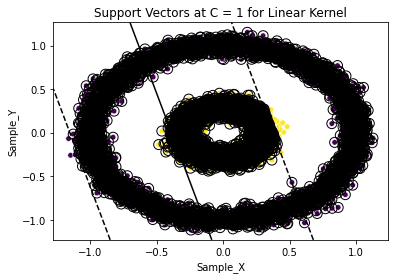

In [ ]:
#Creating the model
model = svm.SVC(kernel='linear', C=1)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
#Plotting the support vectors
axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors at C = 1 for Linear Kernel")
plt.show()

### **Question 2c**

In [ ]:
#Making the Class SVM
class SVMachineRbf():
    def __init__(self):
      super(SVMachineRbf, self).__init__()

    #fit function
    def fit(self,train_X,train_Y,C_val,g_val):
      #Creating a linear SVM model
      self.model = svm.SVC(kernel = 'rbf',C = C_val, gamma = g_val)
      #Calling the fit from linear SVM
      self.model = self.model.fit(train_X,train_Y)
      return self.model

    #predict function from scratch
    def predict(self,X_test):
      #Calculating the predicted value
      predict_y = self.model.decision_function(X_test)
      #Assigning the class labels
      for i in range(predict_y.shape[0]):
        if predict_y[i] < 0:
          predict_y[i] = 0
        else:
          predict_y[i] = 1
      return predict_y
    
    #Support vectors function
    def support_vector(self):
      return self.model.support_vectors_

In [ ]:
#accuracy method to find accuracy
def accuracy(pred,actual):
  pred = np.array(pred).reshape(pred.shape[0],1)
  actual = np.array(actual).reshape(actual.shape[0],1)
  error = pred-actual
  val = (error == 0).sum()
  #Calculate the accuracy
  accuracy = val/pred.shape[0]
  return accuracy*100

**Saving Model**

In [ ]:
# def Question2c(x_train,y_train,x_test,y_test):
#   Question2c = []
#   #Printing the column names
#   columns_names = ["C","Gamma","Testing Accuracy"]
#   #Creating a dataframe
#   Q2_c = pd.DataFrame(columns = columns_names)
#   #Grid Search for the values of C and gamma
#   c_val = [0.01,0.1,0.2,0.5,1,10,100]
#   gammas = [0.01,0.1,0.2,0.5, 0.8,1]
#   best_c = 0
#   best_acc = 0
#   best_g = 0
#   #Loop for iterating over values of C
#   for c in c_val:
#     for g in gammas:
#       #Calling the SVM inbuilt class
#       model = SVMachineRbf()
#       #Fitting model and getting the slope and intercept 
#       model.fit(x_train, y_train,c,g)
#       Question2c.append(model)
#       #Predicting the values of X_test
#       y_pred = model.predict(x_test)
#       #Calculating the accuracy
#       acc_test = accuracy(y_pred,y_test)
#       if (acc_test > best_acc):
#         best_c = c
#         best_acc = acc_test
#         best_g = g
#       Q2_c = Q2_c.append({'C':c,'Gamma':g,'Testing Accuracy':acc_test},ignore_index=True)
#   print("The optimal value of C : ", best_c, "Gamma : ", best_g)
#   print(Q2_c)
#   joblib.dump(Question2c, 'Question2c_grid.pkl') 

# Question2c(x_train,y_train,x_test,y_test)

The optimal value of C :  0.01 Gamma :  0.2
         C  Gamma  Testing Accuracy
0     0.01   0.01              48.8
1     0.01   0.10              48.8
2     0.01   0.20             100.0
3     0.01   0.50             100.0
4     0.01   0.80             100.0
5     0.01   1.00             100.0
6     0.10   0.01              48.8
7     0.10   0.10             100.0
8     0.10   0.20             100.0
9     0.10   0.50             100.0
10    0.10   0.80             100.0
11    0.10   1.00             100.0
12    0.20   0.01              48.8
13    0.20   0.10             100.0
14    0.20   0.20             100.0
15    0.20   0.50             100.0
16    0.20   0.80             100.0
17    0.20   1.00             100.0
18    0.50   0.01              48.8
19    0.50   0.10             100.0
20    0.50   0.20             100.0
21    0.50   0.50             100.0
22    0.50   0.80             100.0
23    0.50   1.00             100.0
24    1.00   0.01              57.0
25    1.00   0.10   

**Loading Model**

In [ ]:
def Question2c(x_train,y_train,x_test,y_test):
  Question2c = []
  #Printing the column names
  columns_names = ["C","Gamma","Testing Accuracy"]
  #Creating a dataframe
  Q2_c = pd.DataFrame(columns = columns_names)
  #Grid Search for the values of C and gamma
  c_val = [0.01,0.1,0.2,0.5,1,10,100]
  gammas = [0.01,0.1,0.2,0.5, 0.8,1]
  best_c = 0
  best_acc = 0
  best_g = 0
  #Loading the models
  model = joblib.load('/content/Question2c_grid.pkl')
  k = 0
  #Loop for iterating over values of C
  for c in c_val:
    for g in gammas:
      #Predicting the values of X_test
      y_pred = model[k].predict(x_test)
      k += 1
      #Calculating the accuracy
      acc_test = accuracy(y_pred,y_test)
      if (acc_test > best_acc):
        best_c = c
        best_acc = acc_test
        best_g = g
      Q2_c = Q2_c.append({'C':c,'Gamma':g,'Testing Accuracy':acc_test},ignore_index=True)
  print("The optimal value of C : ", best_c, "Gamma : ", best_g)
  print(Q2_c)

Question2c(x_train,y_train,x_test,y_test)

The optimal value of C :  0.01 Gamma :  0.2
         C  Gamma  Testing Accuracy
0     0.01   0.01              48.8
1     0.01   0.10              48.8
2     0.01   0.20             100.0
3     0.01   0.50             100.0
4     0.01   0.80             100.0
5     0.01   1.00             100.0
6     0.10   0.01              48.8
7     0.10   0.10             100.0
8     0.10   0.20             100.0
9     0.10   0.50             100.0
10    0.10   0.80             100.0
11    0.10   1.00             100.0
12    0.20   0.01              48.8
13    0.20   0.10             100.0
14    0.20   0.20             100.0
15    0.20   0.50             100.0
16    0.20   0.80             100.0
17    0.20   1.00             100.0
18    0.50   0.01              48.8
19    0.50   0.10             100.0
20    0.50   0.20             100.0
21    0.50   0.50             100.0
22    0.50   0.80             100.0
23    0.50   1.00             100.0
24    1.00   0.01              57.0
25    1.00   0.10   

### **Visualising the Data**

**Rbf kernel at C = 0.01 and Gamma = 0.2**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


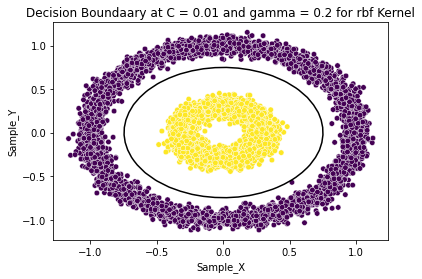

In [ ]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.01, gamma = 0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundaary at C = 0.01 and gamma = 0.2 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


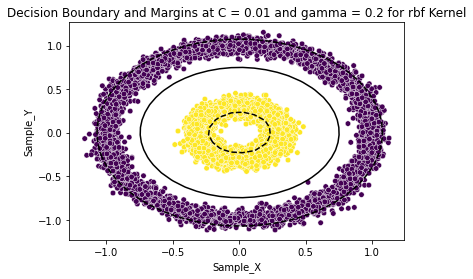

In [ ]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.01, gamma = 0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 0.01 and gamma = 0.2 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


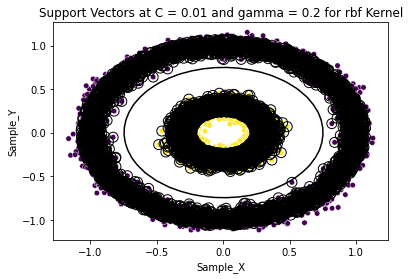

In [ ]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.01, gamma = 0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
#Plotting the support vectors
axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors at C = 0.01 and gamma = 0.2 for rbf Kernel")
plt.show()

**RBF Kernal at C = 0.01 and Gammaa = 0.1**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


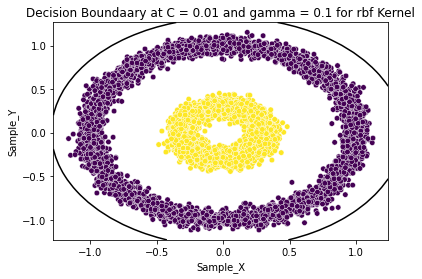

In [20]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.01, gamma = 0.1)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundaary at C = 0.01 and gamma = 0.1 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


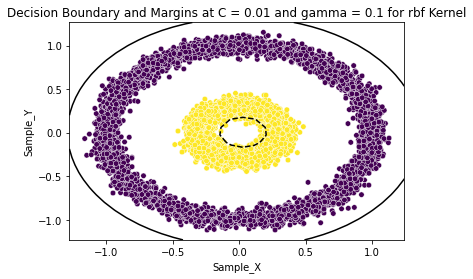

In [21]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.01, gamma = 0.1)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 0.01 and gamma = 0.1 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


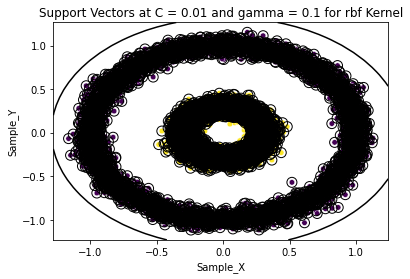

In [22]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.01, gamma = 0.1)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
#Plotting the support vectors
axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors at C = 0.01 and gamma = 0.1 for rbf Kernel")
plt.show()

**RBF kernel at C = 0.01 and Gamma = 0.5**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


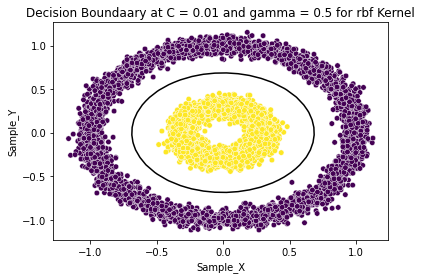

In [23]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.01, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundaary at C = 0.01 and gamma = 0.5 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


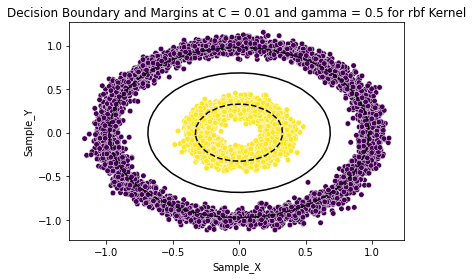

In [24]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.01, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 0.01 and gamma = 0.5 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


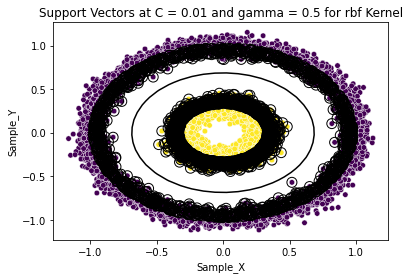

In [25]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.01, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
#Plotting the support vectors
axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors at C = 0.01 and gamma = 0.5 for rbf Kernel")
plt.show()

**Rbf kernel at C = 0.1 and Gamma = 0.2**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


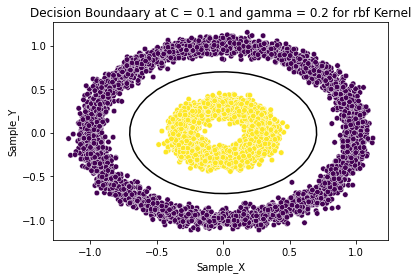

In [26]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.1, gamma = 0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundaary at C = 0.1 and gamma = 0.2 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


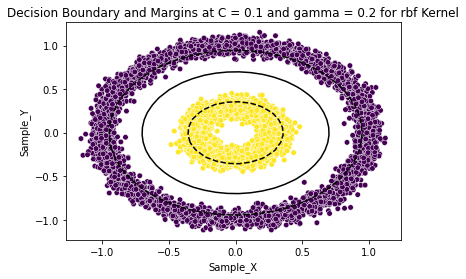

In [27]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.1, gamma = 0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 0.1 and gamma = 0.2 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


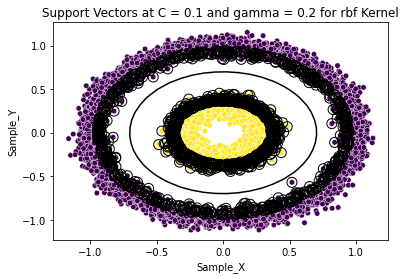

In [28]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.1, gamma = 0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
#Plotting the support vectors
axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors at C = 0.1 and gamma = 0.2 for rbf Kernel")
plt.show()

**Rbf kernel at C = 0.1 and Gamma = 0.1**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


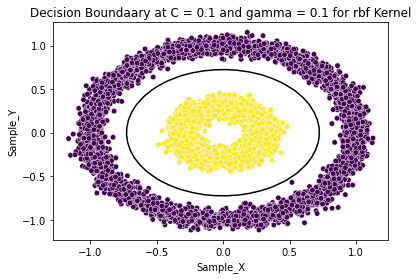

In [ ]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.1, gamma = 0.1)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundaary at C = 0.1 and gamma = 0.1 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


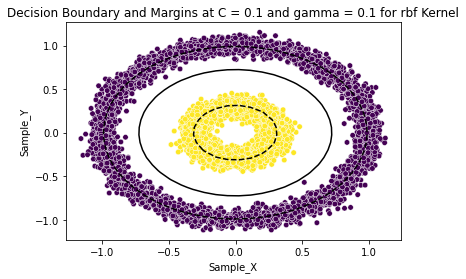

In [ ]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.1, gamma = 0.1)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 0.1 and gamma = 0.1 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


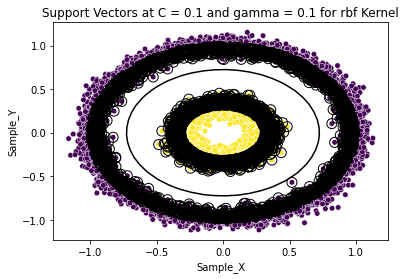

In [ ]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.1, gamma = 0.1)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
#Plotting the support vectors
axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors at C = 0.1 and gamma = 0.1 for rbf Kernel")
plt.show()

**Rbf kernel at C = 0.1 and Gamma = 0.5**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


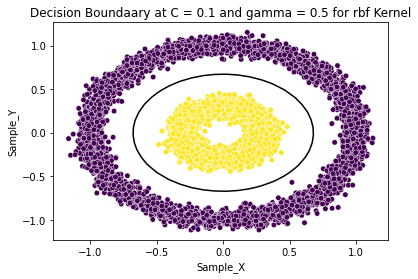

In [29]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.1, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundaary at C = 0.1 and gamma = 0.5 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


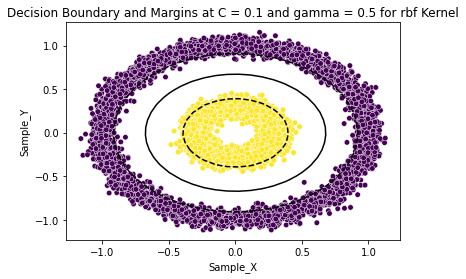

In [30]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.1, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 0.1 and gamma = 0.5 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


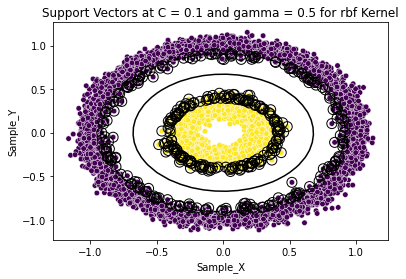

In [31]:
#Creating the model
model = svm.SVC(kernel='rbf', C=0.1, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
#Plotting the support vectors
axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors at C = 0.1 and gamma = 0.5 for rbf Kernel")
plt.show()

**Rbf kernel at C = 1 and Gamma = 0.2**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


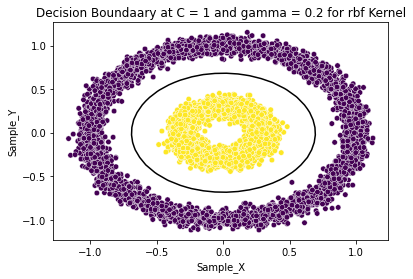

In [32]:
#Creating the model
model = svm.SVC(kernel='rbf', C=1, gamma = 0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundaary at C = 1 and gamma = 0.2 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


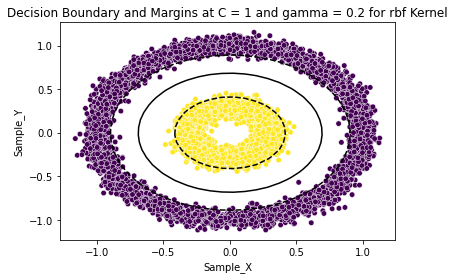

In [33]:
#Creating the model
model = svm.SVC(kernel='rbf', C=1, gamma = 0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 1 and gamma = 0.2 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


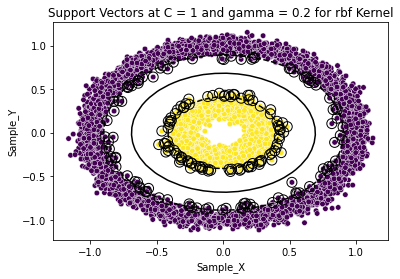

In [34]:
#Creating the model
model = svm.SVC(kernel='rbf', C=1, gamma = 0.2)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
#Plotting the support vectors
axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors at C = 1 and gamma = 0.2 for rbf Kernel")
plt.show()

**Rbf Kernel at C = 1 and Gamma = 0.5**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


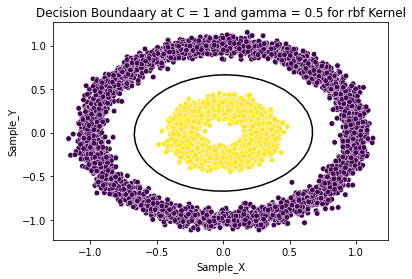

In [35]:
#Creating the model
model = svm.SVC(kernel='rbf', C=1, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundaary at C = 1 and gamma = 0.5 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


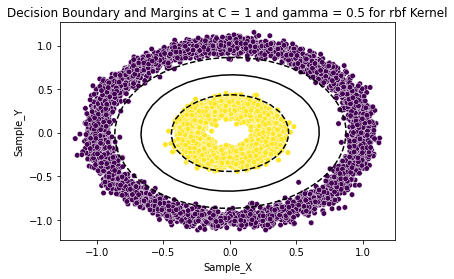

In [36]:
#Creating the model
model = svm.SVC(kernel='rbf', C=1, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 1 and gamma = 0.5 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


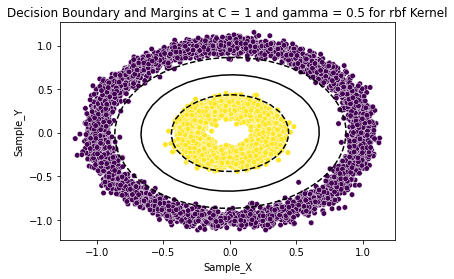

In [38]:
#Creating the model
model = svm.SVC(kernel='rbf', C=1, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 1 and gamma = 0.5 for rbf Kernel")
plt.show()

**Rbf kernel at C = 1 and Gamma = 0.5**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


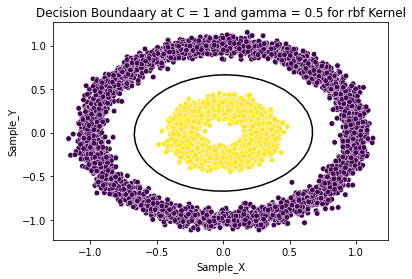

In [ ]:
#Creating the model
model = svm.SVC(kernel='rbf', C=1, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[0], alpha=1,linestyles=['-'])
plt.title("Decision Boundaary at C = 1 and gamma = 0.5 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


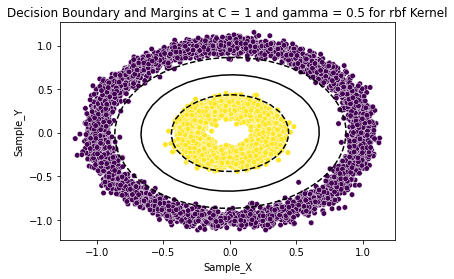

In [ ]:
#Creating the model
model = svm.SVC(kernel='rbf', C=1, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
plt.title("Decision Boundary and Margins at C = 1 and gamma = 0.5 for rbf Kernel")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


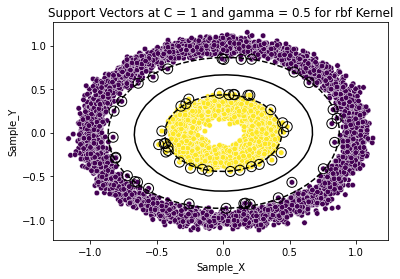

In [ ]:
#Creating the model
model = svm.SVC(kernel='rbf', C=1, gamma = 0.5)
model.fit(x_train, y_train)
#Finding the support vectors
supp_vect = model.support_vectors_
palette = sns.color_palette("dark", 2)
#Plotting the data
sns.scatterplot(x_train['Sample_X'], x_train['Sample_Y'], c=y_train, s=30, legend='full',palette=palette)
#Getting the current axes
axes = plt.gca()
#Getting X and Y axis view limits
xlim_data = axes.get_xlim()
ylim_data = axes.get_ylim()
#Spacing over specified interval
xx = np.linspace(xlim_data[0], xlim_data[1], 30)
yy = np.linspace(ylim_data[0], ylim_data[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
values = model.decision_function(xy).reshape(XX.shape)
#Plotting the decision boundary
axes.contour(XX, YY, values, colors='k', levels=[-1, 0, 1], alpha=1,linestyles=['--', '-', '--'])
#Plotting the support vectors
axes.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.title("Support Vectors at C = 1 and gamma = 0.5 for rbf Kernel")
plt.show()

### **Question 2d**

**Linear Kernel**

In [ ]:
# def Question2d_1(x_train,y_train,x_test,y_test):
#   model = svm.SVC(kernel='linear', C=0.2)
#   model.fit(x_train, y_train)
#   y_pred = model.predict(x_test)
#   print("The accuracy obtained at C = 0.2 is ",accuracy_score(y_test,y_pred)*100)
#   joblib.dump(model, 'Question2d_linear.pkl') 

# Question2d_1(x_train,y_train,x_test,y_test)

The accuracy obtained is  0.667


In [ ]:
def Question2d_1(x_train,y_train,x_test,y_test):
  model = joblib.load('/content/Question2d_linear.pkl')
  y_pred = model.predict(x_test)
  print("The accuracy obtained at C = 0.2 is ",accuracy_score(y_test,y_pred)*100) 

Question2d_1(x_train,y_train,x_test,y_test)

The accuracy obtained at C = 0.2 is  66.7


**Rbf Kernel**

In [ ]:
# def Question2d_2(x_train,y_train,x_test,y_test):
#   model = svm.SVC(kernel='rbf', C=0.01, gamma = 0.2)
#   model.fit(x_train, y_train)
#   y_pred = model.predict(x_test)
#   print("The accuracy obtained at C = 0.01 and gamma = 0.2 is ",accuracy_score(y_test,y_pred)*100)
#   joblib.dump(model, 'Question2d_rbf.pkl') 

# Question2d_2(x_train,y_train,x_test,y_test)

The accuracy obtained at C = 0.01 and gamma = 0.2 is  100.0


In [ ]:
def Question2d_1(x_train,y_train,x_test,y_test):
  model = joblib.load('/content/Question2d_rbf.pkl')
  y_pred = model.predict(x_test)
  print("The accuracy obtained at C = 0.01 and gamma = 0.2 is ",accuracy_score(y_test,y_pred)*100) 

Question2d_1(x_train,y_train,x_test,y_test)

The accuracy obtained at C = 0.01 and gamma = 0.2 is  100.0
